In [1]:
from googleapiclient.discovery import build
!pip install vaderSentiment matplotlib

In [67]:
# api_key = 'TODO'
youtube = build('youtube', 'v3', developerKey=api_key)

In [68]:
video_id = 'AH8A79BrTEY'

In [112]:
def get_video_comments(api_key, video_id, max_results=50):
    youtube = build('youtube', 'v3', developerKey=api_key)

    comments = []
    nextPageToken = None

    # Fetching youtube video comments from the youtube API
    # Extracting displayed text from top level comments
    while True:
        request = youtube.commentThreads().list(
            part='snippet',
            videoId=video_id,
            textFormat='plainText',
            maxResults=min(max_results, 100),
            pageToken=nextPageToken
        )

        response = request.execute()

        for comment in response['items']:
            text = comment['snippet']['topLevelComment']['snippet']['textDisplay']
            comments.append(text)

        # Exploring more comments
        nextPageToken = response.get('nextPageToken')

        if not nextPageToken or len(comments) >= max_results:
            break

    return comments

In [113]:
max_results = 50

# Get comments for the specified video
all_comments = get_video_comments(api_key, video_id, max_results)

In [114]:
all_comments # Print all comments of test video

['Jesus can change yr life ❤',
 'Nice👍',
 '14 million dislike wow',
 "Why is it most disliked video in asia ...i think it's having good content then punnet superstar reels😂",
 '14 million dislikes',
 'can someone tell me why this is disliked so much',
 "What's wrong whit this video??",
 "I'm here in 2023 to see the dislikes but sadly now we can't see it 😂",
 'As a premium User Dislikes are 1.4cr... Thank me  Later 🙄',
 '14M dislikes, keep it rolling',
 'Fun Fact :- This Movie Is The Reason Behind Youtube Removing Dislike Button 😂😂😂',
 'Ye Wo trailer hai jisne dislike button ko hidden krba diya 😂😂😂',
 'Fun fact: we all searched this to see dislikes 😅',
 'He didnt get a certain movie role so he killed himself??? What?',
 'Only watched this to dislike it 😂',
 "3/11/23\nThe dislike count is still 14M\nFor those wo can't see the dislikes.",
 'The number of dislikes here shows the infinite number of likes for Sushant Singh Rajput ♥️♾️ 💎',
 '2023 audience 🙋',
 'Dislike 👎 buttom',
 'The traile

In [115]:
def read_video_id_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Remove leading and trailing whitespaces from each line
    lines = [line.strip() for line in lines]

    return lines

In [116]:
import csv
import os

def write_comments_to_csv(directory, file_name, data):
    file_path = os.path.join(directory, file_name)
    with open(file_path, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        for item in data:
            csv_writer.writerow([item])

In [117]:
def build_training_set(video_id_file, api_key, max_results=50):
  video_ids = read_video_id_from_file(video_id_file)
  output_dir = "test_data"
  print(video_ids)
  res = []
  for id in video_ids:
    comments = get_video_comments(api_key, id, max_results)
    # new_file = str(id) + "_comments" + '.csv'
    # os.makedirs(output_dir, exist_ok=True)
    # write_comments_to_csv(output_dir, new_file, comments)
    res.append(comments)
  print("complete")
  return res

In [118]:
nested_comments = build_training_set("test_vid_ids.txt", api_key, 50)

['AH8A79BrTEY', 'YbJOTdZBX1g', 'Iot0eF6EoNA', 'XXqutzd3zxg', 'hQrmtwhztnc']
complete


Average Negativity Score: 5.46



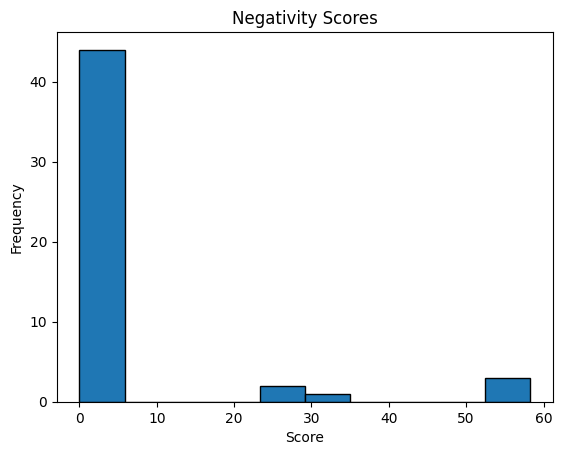

Average Negativity Score: 17.232000000000003



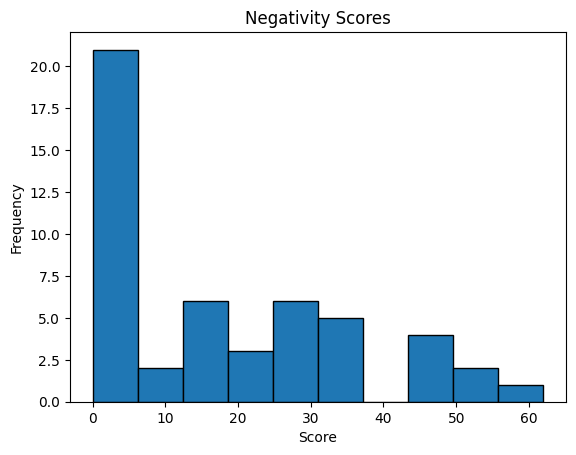

Average Negativity Score: 23.423999999999996



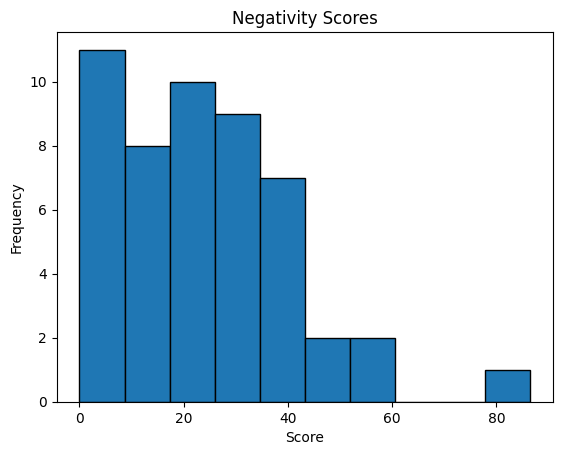

Average Negativity Score: 4.4239999999999995



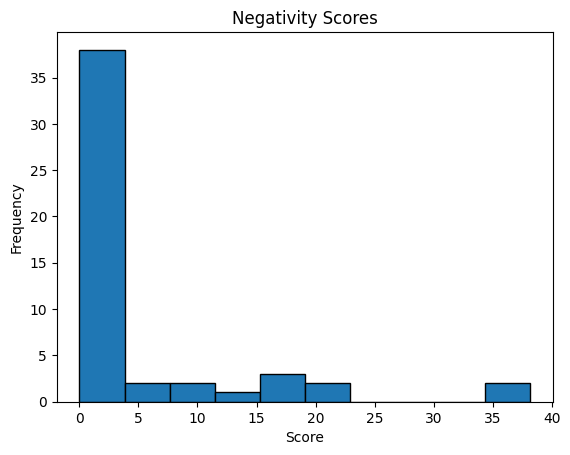

Average Negativity Score: 12.842000000000002



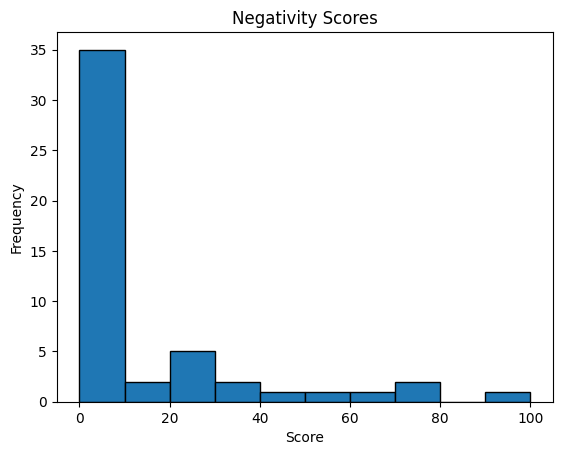

[5.46, 17.232000000000003, 23.423999999999996, 4.4239999999999995, 12.842000000000002]
['AH8A79BrTEY', 'YbJOTdZBX1g', 'Iot0eF6EoNA', 'XXqutzd3zxg', 'hQrmtwhztnc']


In [119]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

def analyze(comments):
  # Initialize the sentiment intensity analyzer
  # print(comments)
  analyzer = SentimentIntensityAnalyzer()

  # Analyze each comment and store the negativity scores
  neg_scores = [analyzer.polarity_scores(comment)['neg'] * 100 for comment in comments if comment]

  # Calculate the average negativity score
  avg_neg_score = sum(neg_scores) / len(neg_scores)
  print(f"Average Negativity Score: {avg_neg_score}\n")

  # Create a histogram of the negativity scores
  plt.hist(neg_scores, bins=10, edgecolor='black')
  plt.title('Negativity Scores')
  plt.xlabel('Score')
  plt.ylabel('Frequency')
  plt.show()
  return avg_neg_score

neg_scores = []
video_ids = read_video_id_from_file("test_vid_ids.txt")
for comments in nested_comments:
  neg_scores.append(analyze(comments))

print(neg_scores)
print(video_ids)

Title: Worlds 2023 Finals Opening Ceremony Presented by Mastercard ft. NewJeans, HEARTSTEEL, and More!
Total Views: 3996511, Estimated Dislikes: 21820.95

Title: YouTube Rewind 2018: Everyone Controls Rewind | #YouTubeRewind
Total Views: 230481758, Estimated Dislikes: 3971661.654

Title: Sadak 2 | Official Trailer | Sanjay | Pooja | Alia | Aditya | Jisshu | Mahesh Bhatt | 28 Aug
Total Views: 81177651, Estimated Dislikes: 1901505.297

Title: Fall Cut Day 25 - Arms and Grocery Trip 230.2 Lbs
Total Views: 3240801, Estimated Dislikes: 14337.304

Title: argyle
Total Views: 1013885, Estimated Dislikes: 13020.311



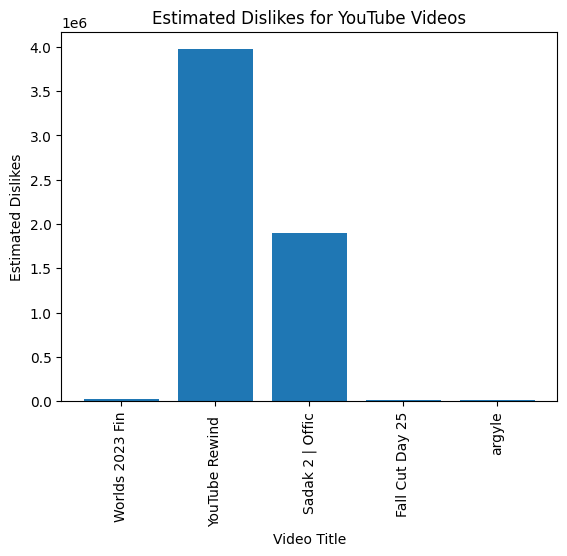

In [125]:
# !pip install pytube
from pytube import YouTube

# Parallel arrays of percentages and YouTube video IDs
percentages = neg_scores

titles = []
dislikes = []

for percentage, video_id in zip(percentages, video_ids):
    try:
        # Create a YouTube object
        yt = YouTube(f"https://www.youtube.com/watch?v={video_id}")

        # Get the title of the video
        title = yt.title
        titles.append(title)

        # Estimate the dislikes
        percentage *= .1
        estimated_dislikes = round(yt.views * ((percentage / 100)), 3)
        dislikes.append(estimated_dislikes)

        print(f"Title: {title}\nTotal Views: {yt.views}, Estimated Dislikes: {estimated_dislikes}\n")
    except Exception as e:
        print(f"An error occurred while processing video ID {video_id}: {e}")

# Create a bar chart of the estimated dislikes
plt.bar([t[:15] for t in titles], dislikes)
plt.title('Estimated Dislikes for YouTube Videos')
plt.xlabel('Video Title')
plt.ylabel('Estimated Dislikes')
plt.xticks(rotation=90)
plt.show()
